In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_limits = pd.read_csv("/home/nogaschw/Codeworkout/Thesis/Results/results_with_limit.csv")

In [3]:
df_limits.columns = ['model', 'epoch', 'roc_auc', 'accuracy', 'precision', 'recall', 'f1']
df_limits[['model_name', 'limit']] = df_limits['model'].str.split(',', expand=True)
df_limits['limit'] = df_limits['limit'].str.split(':', expand=True)[1]
df_limits['limit'] = pd.to_numeric(df_limits['limit'])

In [4]:
def create_graphs(df):
    model_names = df['model_name'].unique()

    # Create a figure and axis for each model
    for model in model_names:
        plt.figure(figsize=(8, 6))
        
        # Filter data for the current model
        model_data = df[df['model_name'] == model]
        
        # Plot limit vs F1 score
        plt.plot(model_data['limit'], model_data['f1'], marker='o', linestyle='-')
        
        # Set titles and labels
        plt.title(f'Limit vs F1 Score for {model}')
        plt.xlabel('Limit')
        plt.ylabel('F1 Score')
        
        # Show grid and plot
        plt.grid(True)
        plt.show()

# According to Epoch 6

In [5]:
df_limits_6 = df_limits[df_limits['epoch'] == 6]

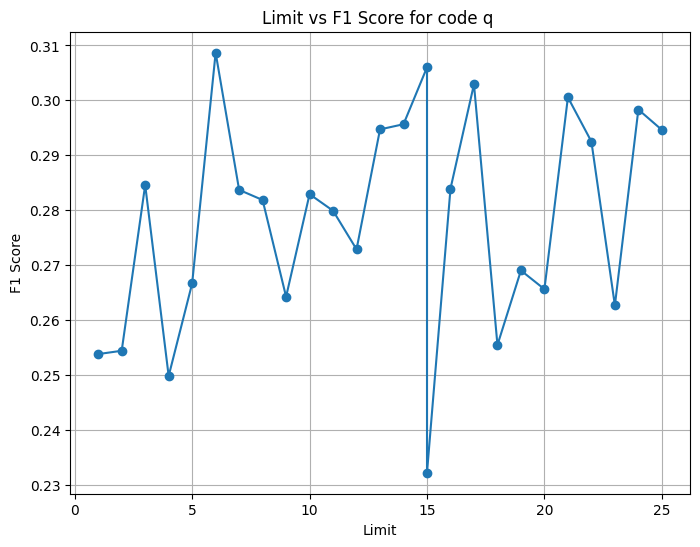

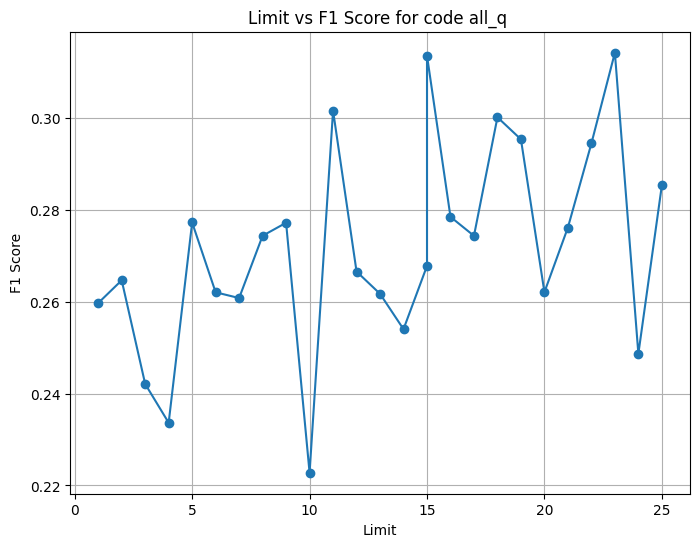

In [6]:
create_graphs(df_limits_6)

# Best F1 Score to Each Limit

In [11]:
df_sorted = df_limits.sort_values(by=['f1'])
first_f1_per_model = df_sorted.groupby('model').first().reset_index()

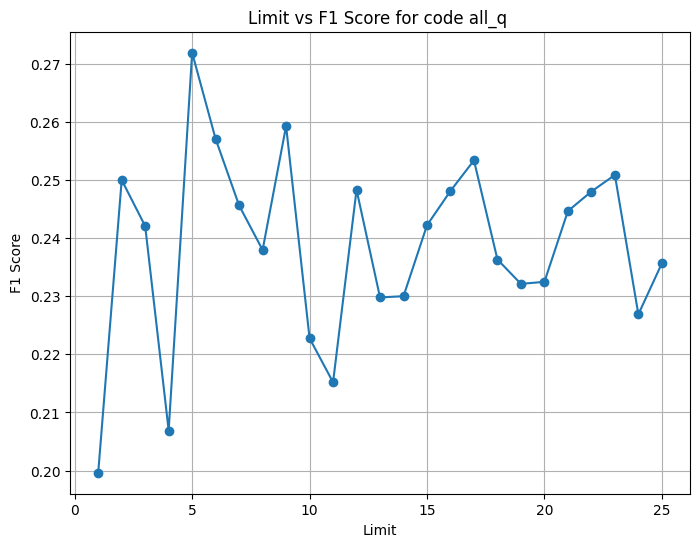

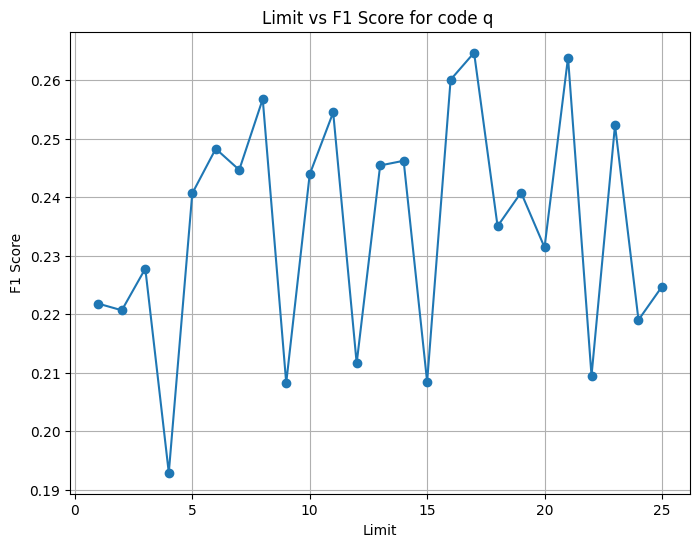

In [14]:
create_graphs(first_f1_per_model.sort_values(by=['limit']))